### Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Read the Dataset :

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Understanding the Data :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

### DATA PREPROCESSING :

In [5]:
## Checking Null Values :

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
## Checking Duplicates :

df.duplicated().sum()

1081

In [7]:
## Removing Duplicates :

df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
## Checking DataTypes : 

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Exploratory Data Analysis {EDA} :

In [10]:
## Descriptive Analysis :

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

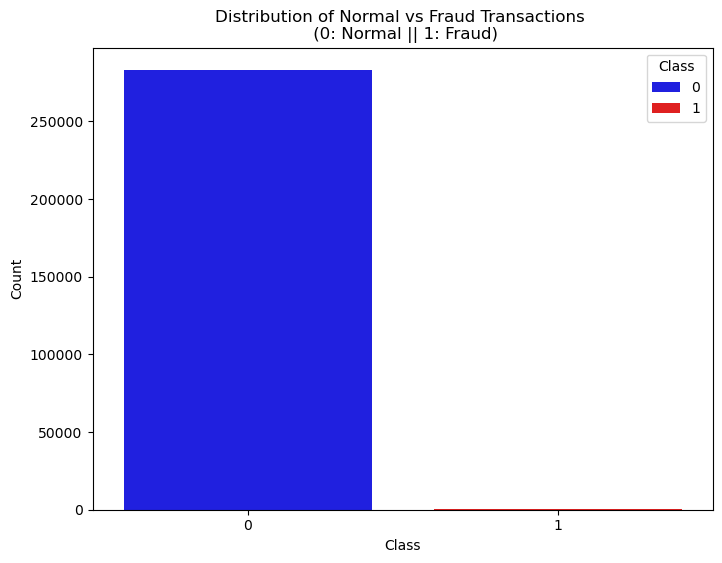

In [12]:
## Visualize the distribution of the target variable :

plt.figure(figsize=(8, 6))
colors = ['Blue', 'Red']
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Normal vs Fraud Transactions \n (0: Normal || 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Correlation Analysis {Using HeatMap} :

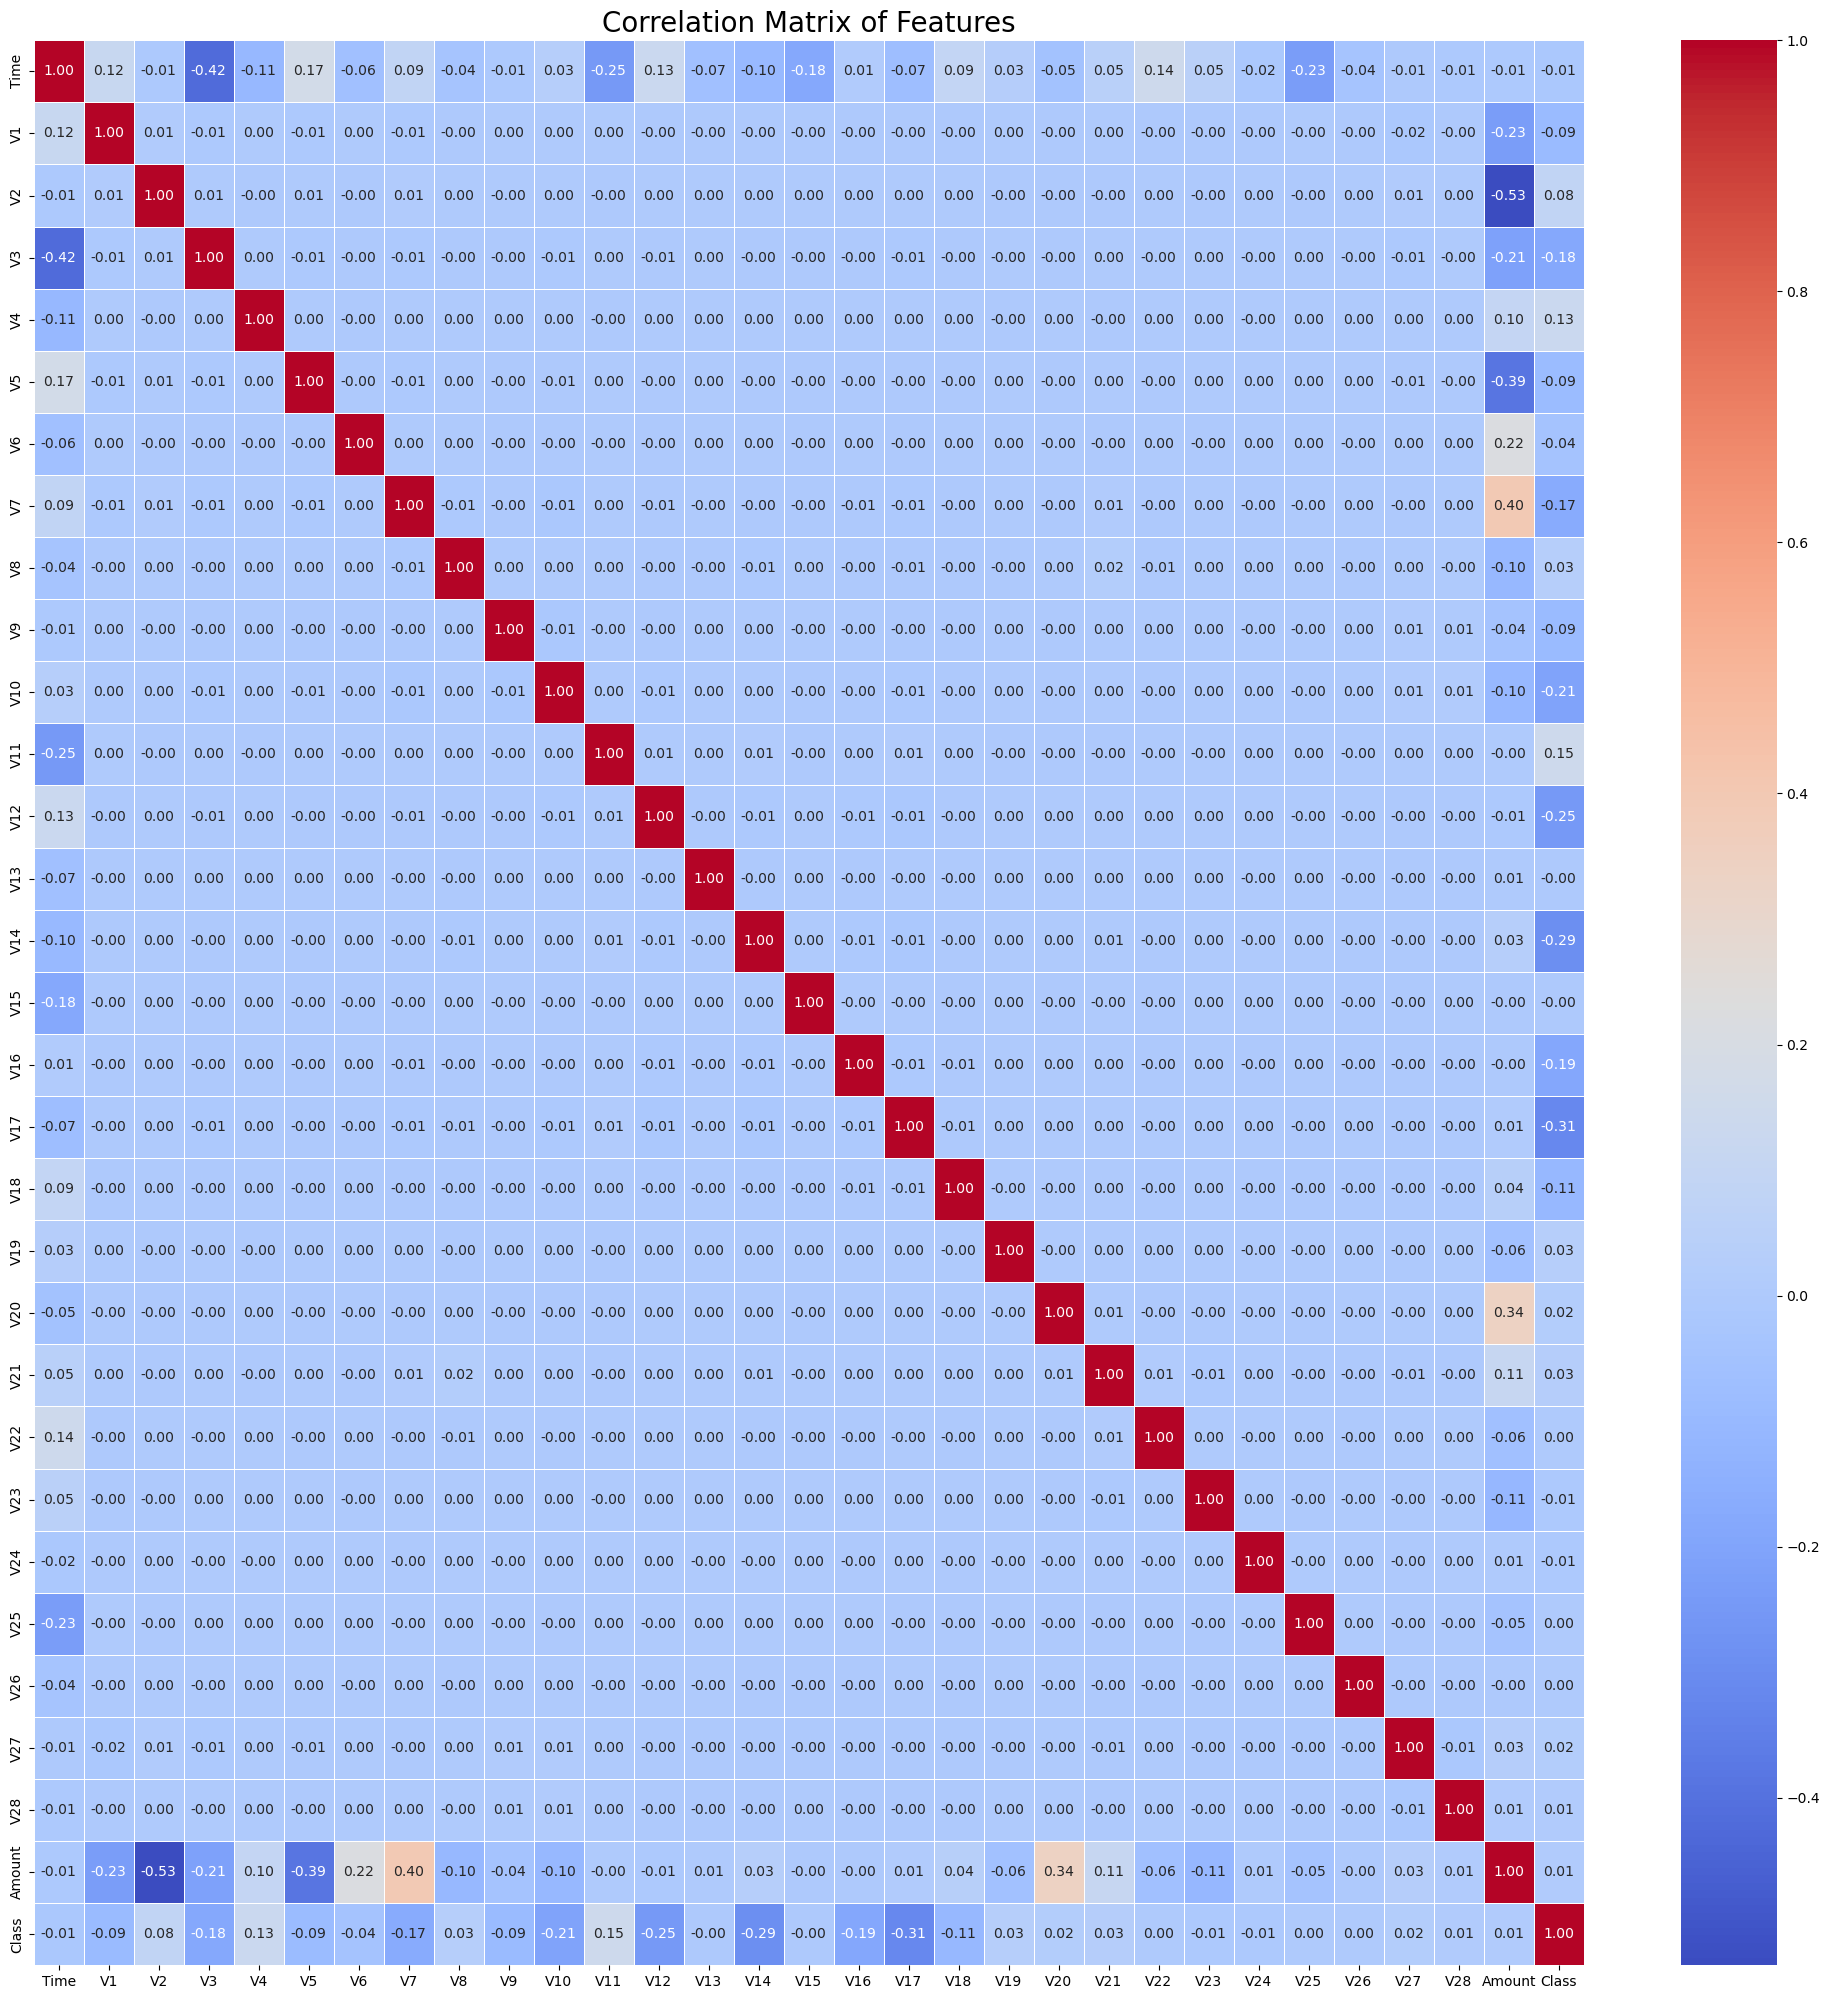

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

### Standardize 'Amount' and 'Time' 

In [14]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


### Split features and target

In [16]:
x = df.drop('Class', axis=1)
y = df['Class']

### Split Data into Training and Test Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (226980, 30)
x_test (56746, 30)
y_train (226980,)
y_test (56746,)


In [18]:
def train_model(x_train, x_test, y_train, y_test):
    classifier = {"Logistic Regression": LogisticRegression(),
                  "Decision Tree Classifier": DecisionTreeClassifier(),
                  "RandomForestClassifier": RandomForestClassifier(random_state=42)}
    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred = model.predict(x_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
        
        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")
    
        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        
print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[56650     6]
 [   42    48]]


Accuracy: 0.9991541254009093


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.7666137155229219



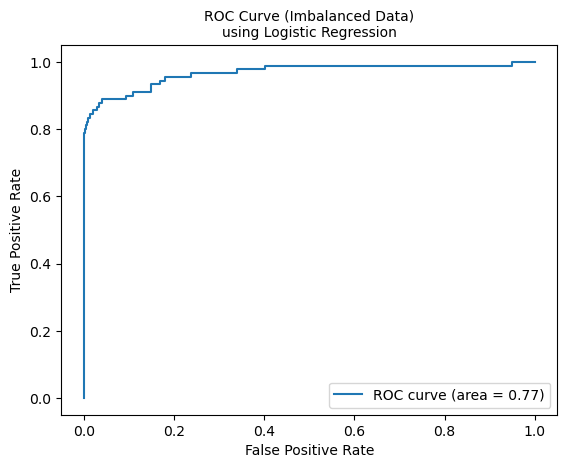


================ Decision Tree Classifier ================

Confusion Matrix:
[[56626    30]
 [   23    67]]


Accuracy: 0.999066013463504


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.74      0.72        90

    accuracy                           1.00     56746
   macro avg       0.85      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.8719574665034986



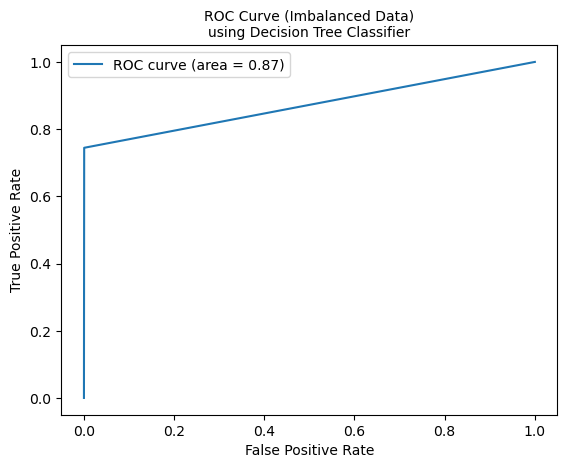


================ RandomForestClassifier ================

Confusion Matrix:
[[56654     2]
 [   24    66]]


Accuracy: 0.9995418179254926


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.8666490162854185



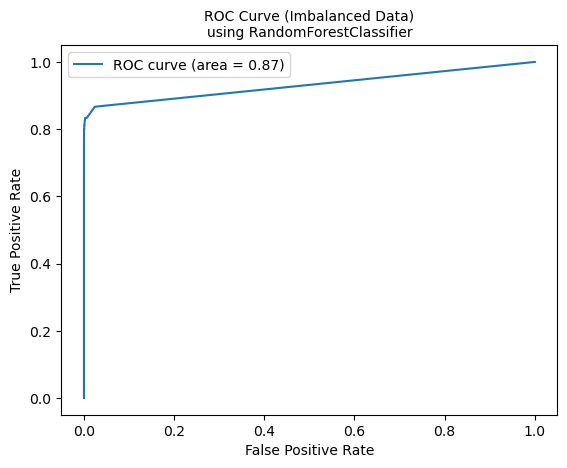

In [19]:
train_model(x_train, x_test, y_train, y_test)

#### Handling Imbalanced Data {OverSampling} :

In [20]:
## Split features and target
x = df.drop('Class', axis=1)
y = df['Class']

In [21]:
## Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[55000  1463]
 [ 4737 52102]]


Accuracy: 0.9452789888969303


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302


ROC-AUC Score (Imbalanced Data): 0.9453742812962184



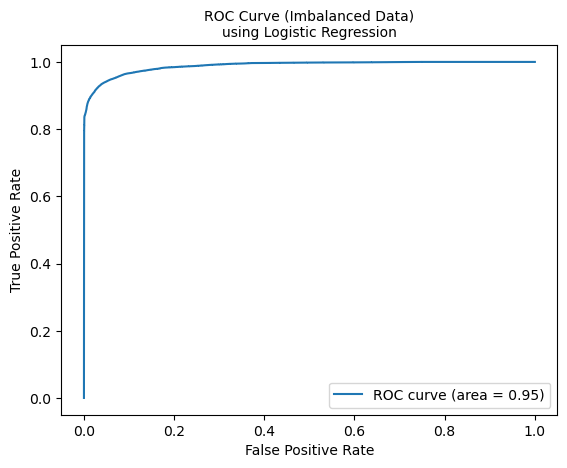


================ Decision Tree Classifier ================

Confusion Matrix:
[[56322   141]
 [   47 56792]]


Accuracy: 0.9983407177278424


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9983379462062002



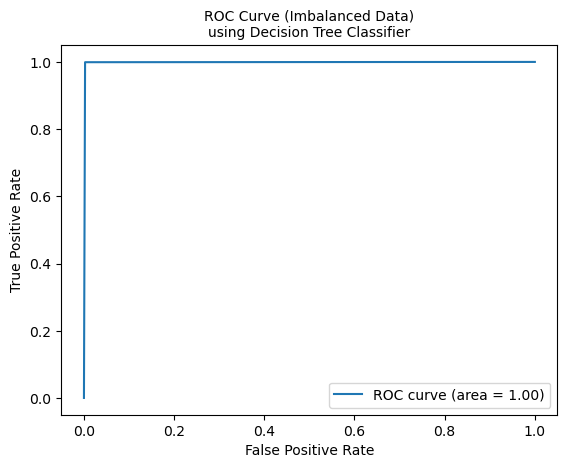


================ RandomForestClassifier ================

Confusion Matrix:
[[56452    11]
 [    0 56839]]


Accuracy: 0.9999029143351397


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9999025910773427



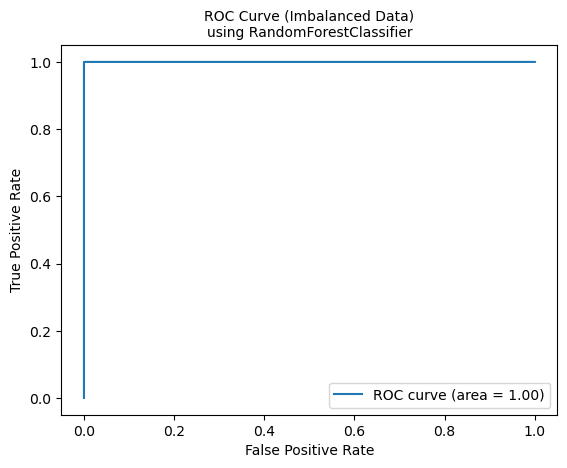

In [23]:
train_model(x_train, x_test, y_train, y_test)

<b>Conclusion :</br></b>
In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included
:
1.	Data Exploration and Preprocessing: We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.
2.	Correlation Analysis: By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.
3.	Handling Imbalanced Data: We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.
4.	Model Training and Evaluation: We trained and evaluated various classifiers, including Logistic Regression, Decision Tree, and RandomForest. We assessed model performance using metrics such as confusion matrices, classification reports, ROC-AUC scores, and ROC cuves.
nced ata.
